# importing all necessary libraries

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import pandas as pd 

# Data Collection

In [2]:
stock_apple=yf.download('AAPL',start = '2020-1-1')
stock_apple.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-01-23,224.740005,227.029999,222.300003,223.660004,223.660004,60234800
2025-01-24,224.779999,225.630005,221.410004,222.779999,222.779999,54697900
2025-01-27,224.020004,232.149994,223.979996,229.860001,229.860001,94863400
2025-01-28,230.850006,240.190002,230.809998,238.259995,238.259995,75707600
2025-01-29,234.119995,239.860001,234.009995,239.360001,239.360001,45486100
2025-01-30,238.669998,240.789993,237.210007,237.589996,237.589996,55658300
2025-01-31,247.190002,247.190002,233.440002,236.000000,236.000000,101075100
2025-02-03,229.990005,231.830002,225.699997,228.009995,228.009995,73063300
2025-02-04,227.250000,233.130005,226.649994,232.800003,232.800003,45067300


In [3]:
stock = pd.DataFrame(stock_apple.iloc[:,3]).dropna()
stock

,Close
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501
...,...
2025-01-30,237.589996
2025-01-31,236.000000
2025-02-03,228.009995


# Data Preprocessing

In [1]:
fig= px.box(stock, y=['Close'], 
           title='Outlier Check ',
           template = 'plotly_dark')
fig.show()

NameError: name 'px' is not defined

In [6]:
stock['Close'].isnull().sum()

0

# Exploratory Data Analysis

In [7]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
stl= STL( stock['Close'], period= 30)
result = stl.fit()

In [8]:
trend1_stl= result.trend
seasonal1_stl= result.seasonal
residual1_stl= result.resid

In [9]:
fig=px.line(stock,y=['Close'],
          #markers=True,
          template='plotly_dark',
           title = ' Original Data ')
fig.show()

fig=px.line(trend1_stl,
          #markers=True,
          template='plotly_dark',
           title = 'Trend ')
fig.show()

fig=px.line(seasonal1_stl,
          #markers=True,
          template='plotly_dark',
           title='Seasonality')
fig.show()

fig=px.line(residual1_stl,
          #markers=True,
          template='plotly_dark',
           title=' Residual')


fig.show()

# Checking Stationarity 

In [10]:
from statsmodels.tsa.stattools import adfuller


In [11]:
def adf_test (series):
    result = adfuller(series)
    print('ADF statistics is : {}'.format(result[0]))
    print('p-value is : {}'.format(result[1]))
    print('N no. of lags : {}'.format(result[2]))
    print('N no. of Observation : {}'.format(result[3]))
    print('Criticl Values : {}'.format(result[4]))
    if result[1] <= 0.05:
        print( 'Given Data is Stationary')
    else:
        print( 'Given Data is non Stationary so, We need to Convert Stationary ')

In [12]:
adf_test(stock['Close'])

ADF statistics is : -1.089877530870221
p-value is : 0.7190917012041731
N no. of lags : 0
N no. of Observation : 1173
Criticl Values : {'1%': -3.435937099783359, '5%': -2.864007125872554, '10%': -2.5680835504811657}
Given Data is non Stationary so, We need to Convert Stationary 


In [13]:
fig=px.line(stock['Close'],
          #markers=True,
          template='plotly_dark',
           title='Before Stationarity')
fig.show()

In [14]:
stock['Close_differnce']= stock['Close'] - stock['Close'].shift(2)
stock1=stock.dropna()

In [15]:
adf_test(stock1['Close_differnce'])

ADF statistics is : -7.636502651943108
p-value is : 1.9460767394349168e-11
N no. of lags : 16
N no. of Observation : 1155
Criticl Values : {'1%': -3.4360243661274414, '5%': -2.8640456240825074, '10%': -2.568104053709638}
Given Data is Stationary


In [16]:
fig=px.line(stock1['Close_differnce'],
          #markers=True,
          template='plotly_dark',
           title='After Stationarity')
fig.show()

# Model selection

In [17]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


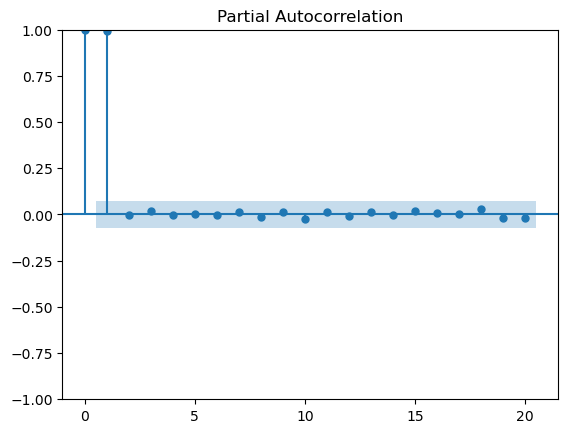

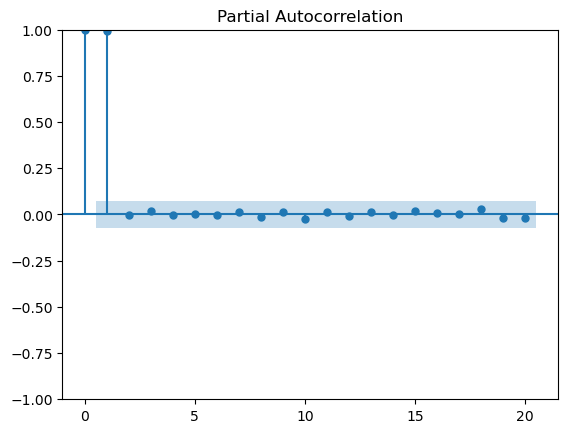

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(stock['Close'],lags=20 , alpha=0.01)

In [49]:
from pmdarima.arima import auto_arima
mod= auto_arima(stock['Close'], start_p=1 , start_q=1 , max_p=2 , max_q=2, m=12 , seasonal = True , d=1,D=1 ,trace = True , error_action ='ignore', suppress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6430.330, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6100.384, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.32 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6431.132, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5948.839, Time=0.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.31 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5947.262, Time=0.44 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=6099.579, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.42 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5948.824, Time=0.78 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5950.648, Time=1.73 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5949.2

In [50]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1174
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -2970.631
Date:                            Sun, 01 Sep 2024   AIC                           5947.262
Time:                                    11:43:45   BIC                           5962.433
Sample:                                         0   HQIC                          5952.986
                                           - 1174                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6758      0.024    -28.435      0.000      -0.722      -0.629
ar.S.L24      -0.3539      0.027    -13.198      0.000      -0.406      -0.301
sigma2         9.7158      0.285     34.109      0.000       9.158      10.274
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               212.37
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.04
Prob(H) (two-sided):                  0.79   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
from statsmodels.tsa.arima.model import ARIMA
p,d,q = 2,1,2
model = ARIMA(stock['Close'], order=(p,d,q))
model = model.fit()
model.summary()

forecast = model.predict(len(stock['Close']),len(stock['Close'])+120)
forecast
forecast

1174    228.893029
1175    228.668148
1176    228.434095
1177    228.303350
1178    228.338084
           ...    
1290    228.701432
1291    228.530782
1292    228.416611
1293    228.413416
1294    228.522054
Name: predicted_mean, Length: 121, dtype: float64

In [59]:
stock['Close'].isnull().sum()

0

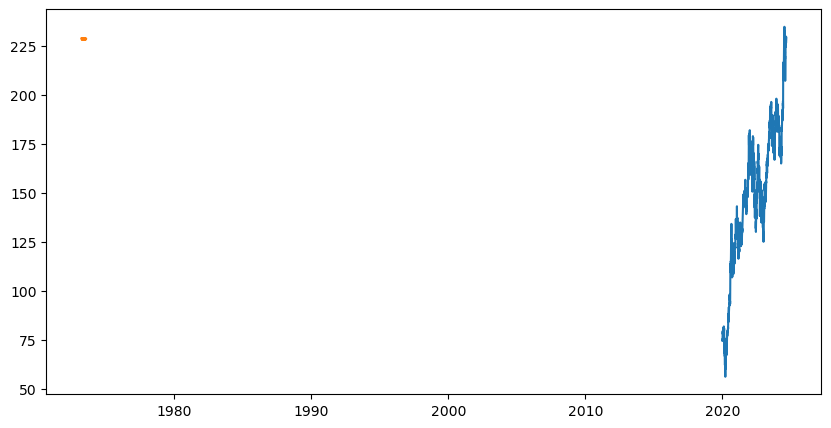

In [60]:
plt.figure(figsize=(10,5))
plt.plot(stock['Close'], label = 'Close')
plt.plot(forecast , label = 'Forecast')


# ARIMA model

In [18]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [19]:
stepwise_fit = auto_arima(stock1['Close'], trace= True , suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.058, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5651.544, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5651.527, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5650.843, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5653.065, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.718 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1172
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2823.029
Date:                Sun, 01 Sep 2024   AIC                           5650.058
Time:                        11:15:11   BIC                           5660.190
Sample:                             0   HQIC                          5653.879
                               - 1172                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1316      0.079      1.670      0.095      -0.023       0.286
sigma2         7.2695      0.209     34.740      0.000       6.859       7.680
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):               219.93
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.02
Prob(H) (two-sided):                  0.77   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(stock1['Close'],order=(2,1,2))
model_fit=model.fit()

<Axes: xlabel='Date'>

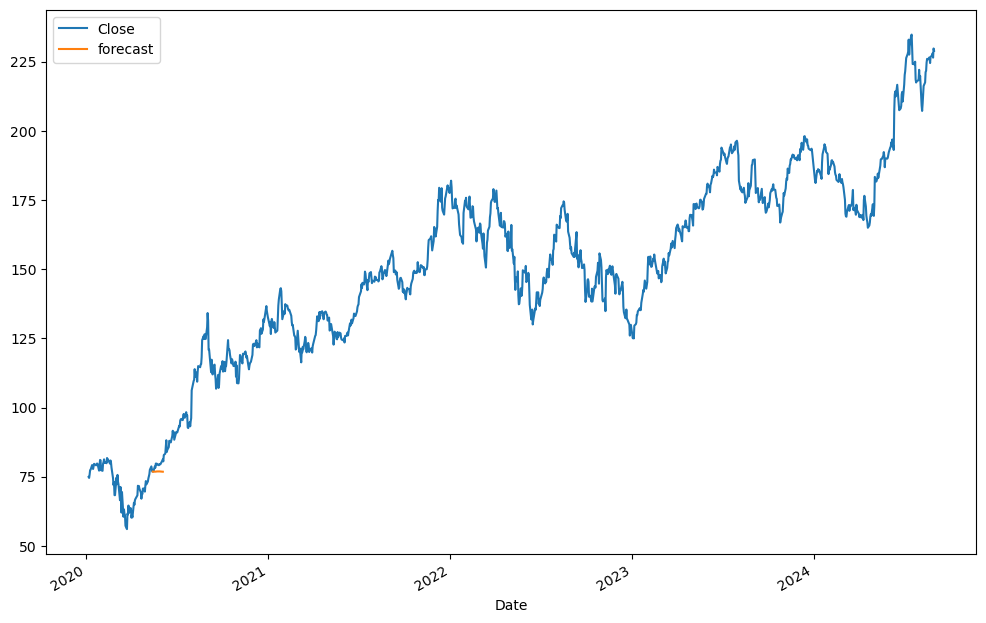

In [46]:
stock1['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
stock1[['Close','forecast']].plot(figsize=(12,8))

In [22]:
n_periods = len(stock1['Close'])
forecast = model_fit.predict(n_periods=n_periods)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Calculate MAE and RMSE
mae = mean_absolute_error(stock1['Close'], forecast)
rmse = np.sqrt(mean_squared_error(stock1['Close'], forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 2.06377962262152
Root Mean Squared Error (RMSE): 3.4747256032062404


In [24]:
stock1['Close'].mean()

148.60152301853427

# SARIMAX model

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [26]:
stock2 = stock1['forecast'].dropna()


In [62]:
order = (2,1,2)            
seasonal_order = (2,1,2,12) 

model = SARIMAX(stock1['Close'], order=order, seasonal_order=seasonal_order)

model_fit = model.fit(disp=False)

In [36]:
print('model summary')
model_fit.summary()


model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1172
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2821.396
Date:                            Sun, 01 Sep 2024   AIC                           5660.791
Time:                                    11:37:22   BIC                           5706.289
Sample:                                         0   HQIC                          5677.959
                                           - 1172                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0140      0.142      0.098      0.922      -0.264       0.292
ar.L2          0.8846      0.141      6.264      0.000       0.608       1.161
ma.L1         -0.0075      0.131     -0.058      0.954      -0.264       0.249
ma.L2         -0.9055      0.131     -6.917      0.000      -1.162      -0.649
ar.S.L12      -0.9996      0.078    -12.771      0.000      -1.153      -0.846
ar.S.L24      -0.0008      0.030     -0.027      0.979      -0.060       0.059
ma.S.L12      -0.0033     22.635     -0.000      1.000     -44.366      44.360
ma.S.L24      -0.9967     22.501     -0.044      0.965     -45.098      43.105
sigma2         7.2514    163.847      0.044      0.965    -313.884     328.387
===================================================================================
Ljung-Box (L1) (Q):                   0.70   Jarque-Bera (JB):               194.82
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.01
Prob(H) (two-sided):                  0.66   Kurtosis:                         5.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
forecast = model_fit.get_forecast(steps=100)
forecast_index = pd.date_range(start=stock1.index[-1] + pd.Timedelta(days=1), periods=100, freq='D')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()
stock1['fitted'] = model_fit.fittedvalues

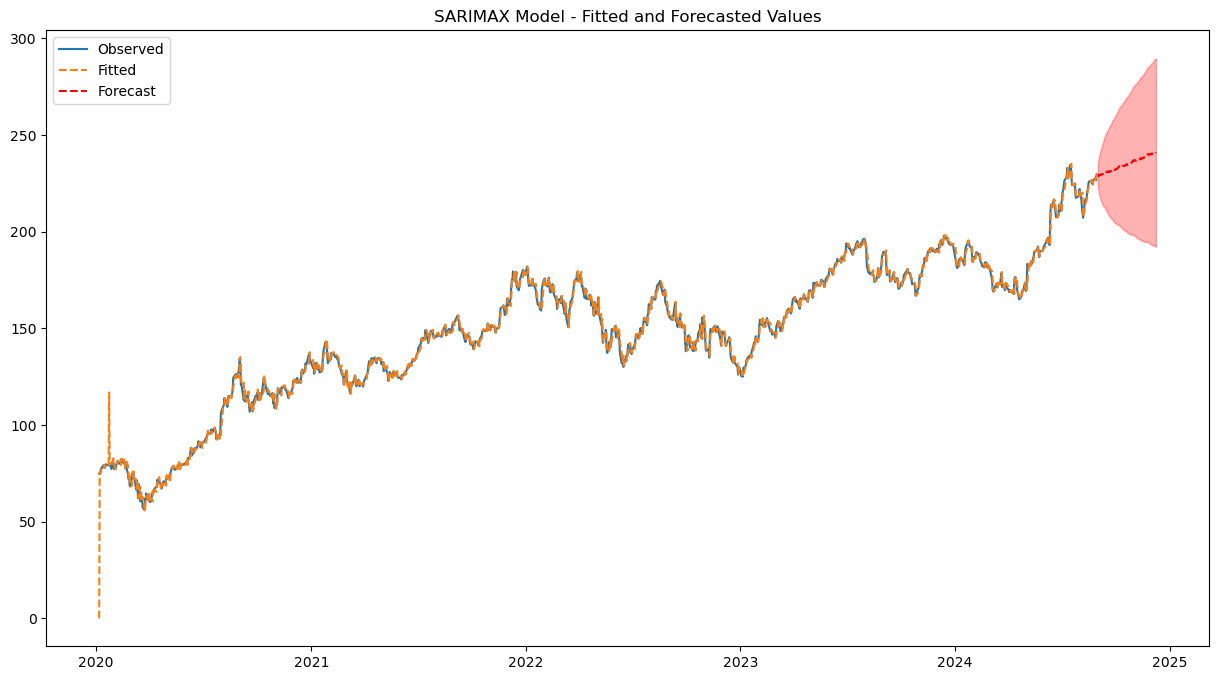

In [44]:
plt.figure(figsize=(15, 8))
plt.plot(stock1.index, stock1['Close'], label='Observed')
plt.plot(stock1.index, stock1['fitted'], label='Fitted', linestyle='--')
plt.plot(forecast_index, forecast_values, label='Forecast', linestyle='--', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMAX Model - Fitted and Forecasted Values')
plt.legend(loc='upper left')
plt.show()


# SARIMAX Model (Accuracy)

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate MAE and RMSE
mae = mean_absolute_error(stock1['Close'][-100:], forecast_values)
rmse = np.sqrt(mean_squared_error(stock1['Close'][-100:], forecast_values))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 31.1383275756758
Root Mean Squared Error (RMSE): 35.93813799636107


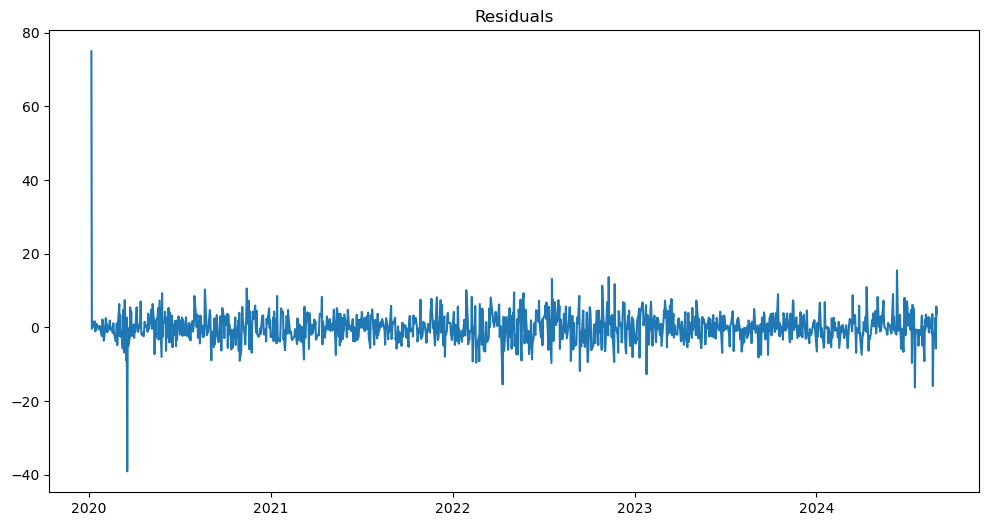

In [32]:
# Residuals
residuals = stock1['Close'] - stock1['fitted']
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals')
plt.show()


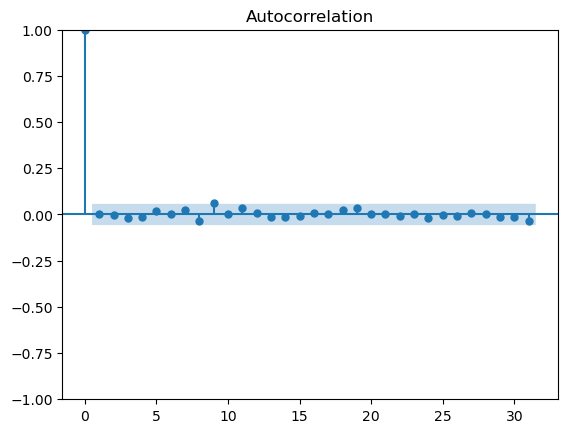

In [33]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals.dropna())
plt.show()

In [63]:
stock.mean()

Close              148.475664
Close_differnce      0.263946
dtype: float64